<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.2 
# *The Perceptron*

The perceptron is the basic unit of a neural network. It learns by adjusting the weights applied to each of its inputs until the error at its output is minimised.

The example in this lab uses the stochastic gradient descent (SGD) algorithm to optimise the weights of a perceptron applied to a 2D classification problem.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


The training dataset has 2 numeric features (X is 2D) and a binary response (y = +/-1):

In [3]:
X = np.array([[-1, 3], [1, 4], [4, 4], [-1, 5], [2, 6], [5, 6]])
y = np.array([-1, -1, -1, 1, 1, 1])

Here is the training data, along with a candidate hyperplane that separates the classes:

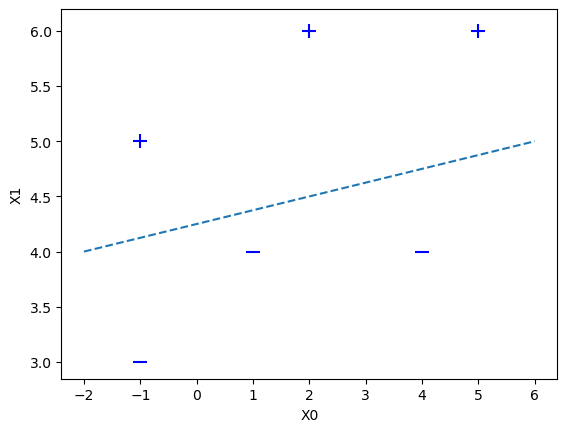

In [4]:
def plotData(X):
    for d, sample in enumerate(X):
        # Plot the negative samples
        if d < 3:
            plt.scatter(sample[0], sample[1], s = 100, marker = '_', color = 'blue')
        # Plot the positive samples
        else:
            plt.scatter(sample[0], sample[1], s = 100, marker = '+', color = 'blue')
    plt.xlabel('X0')
    plt.ylabel('X1')

plotData(X)

# Print one possible hyperplane that separates the two classes:
plt.plot([-2, 6], [4, 5], linestyle = 'dashed')

We need to include a bias term (-1) in the X array. This will transform the decision boundary so that the sign of the dot product of any data point with the weights vector, represented in the code below by $$⟨x[i], w⟩ = {\rm wt}[0]\times x_0 + {\rm wt}[1]\times x_1 + {\rm wt}[2]\times(-1),$$  will determine class membership: 

In [5]:
X = np.array([ [-1, 3, -1], [1, 4, -1], [4, 4, -1], [-1, 5, -1], [2, 6, -1], [5, 6, -1]])

Here is a simple implementation of the stochastic gradient descent algorithm for computing the weights:

In [6]:
def calc_perceptron_weights(Xt, Yt, eta = 1, epochs = 20):
    
    # Initialize the weight vector for the perceptron with zeros:
    wt = np.zeros(len(Xt[0]))
    
    for t in range(epochs):
        
        # Iterate over each sample in the data set:
        for i, x in enumerate(Xt):
            
            # Test for misclassification: y * ⟨x[i], w⟩ <= 0:
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                
                # Update weights:
                wt = wt + eta * Xt[i] * Yt[i]

    return wt

Compute the weights using default learning rate (eta = 1) and number of epochs = 10:

In [7]:
w = calc_perceptron_weights(X, y, epochs = 10)
print(w)

[3. 8. 6.]


Did it work? Let's check the decision boundary (hyperplane) and try some predictions:

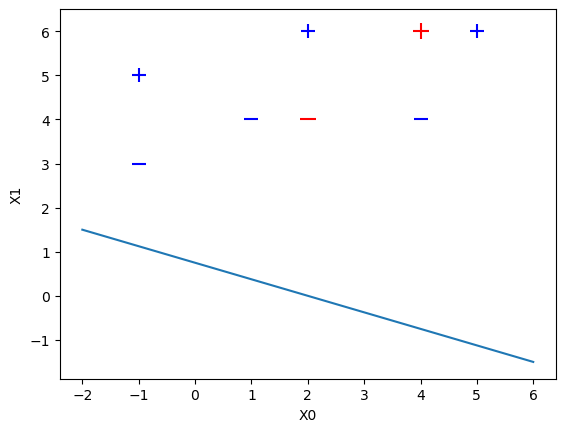

In [8]:
def plotHyperplane(wt):

    xx = np.linspace(-2,6)
    yy = (-wt[0]*xx + wt[2])/wt[1]
    plt.plot(xx, yy)
    
plotData(X)
plotHyperplane(w)

# Test samples:
plt.scatter(2, 4, s = 120, marker = '_', color = 'red')
plt.scatter(4, 6, s = 120, marker = '+', color = 'red')    

So far, all of the negatively labelled points are misclassified! 

Let's a look at how the model training actually proceeds. The error at each epoch is calculated using a hinge-loss function:

[3. 8. 6.]


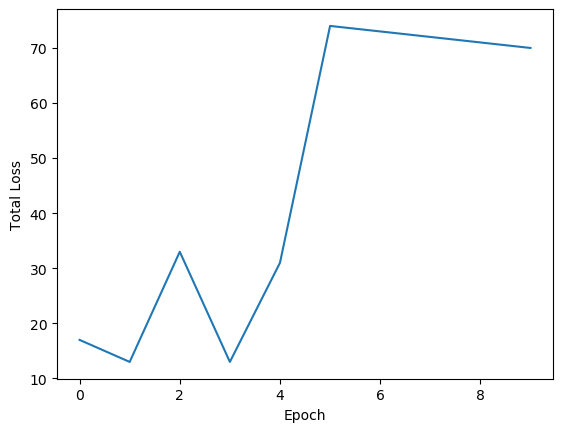

In [9]:
def perceptron_plot(Xt, Yt, eta = 1, epochs = 10):

    wt = np.zeros(len(Xt[0]))
    errors = []

    for t in range(epochs):
        error = 0
        for i, x in enumerate(Xt):
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                error += -(np.dot(Xt[i], wt) * Yt[i])
                wt += eta * Xt[i] * Yt[i]
        errors.append(error)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return wt

print(perceptron_plot(X, y))

So, 10 epochs clearly wasn't enough for the SGD algorithm to converge. 

Try increasing `epochs` until the error goes to zero, then replot the test data and decision boundary:

[ 0.  6. 27.]


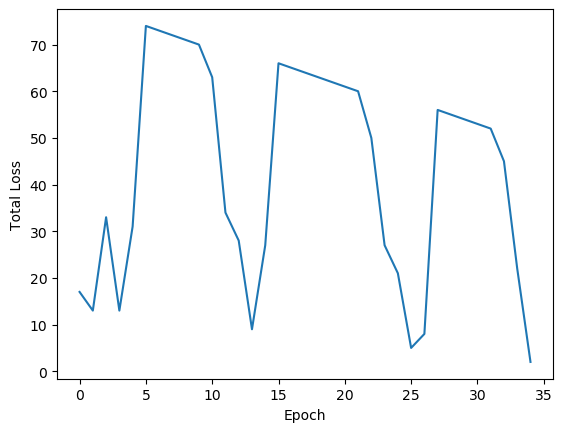

In [10]:
print(perceptron_plot(X,y, epochs= 35 ))

[ 0.  6. 27.]


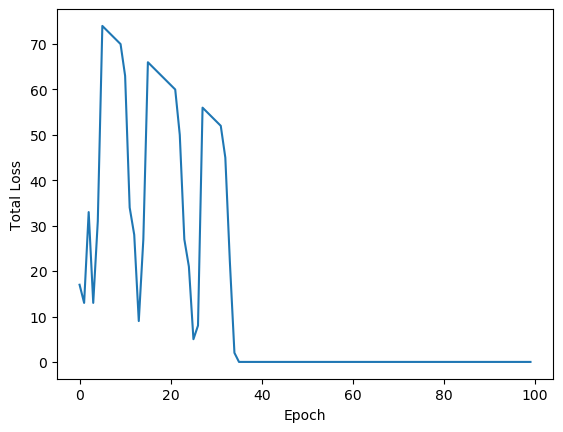

In [11]:
print(perceptron_plot(X,y, epochs= 100 ))


Show how to manually compute class membership for a new data point Xi = [3.5, 3.3] using just the weights determined above:

In [12]:
def predict_class_membership(X, w1, w2, b):
    """
    Predict class membership for a new data point using weights and bias.
    
    Args:
        X (list or numpy array): The new data point with two features [feature1, feature2].
        w1 (float): Weight for feature 1.
        w2 (float): Weight for feature 2.
        b (float): Bias term.
        
    Returns:
        int: Predicted class label (0 or 1).
    """
    # Compute the weighted sum of features and add the bias term
    z = w1 * X[0] + w2 * X[1] + b
    
    # Apply the activation function (sigmoid in this case) to get the predicted class label
    predicted_class = 1 if 1 / (1 + np.exp(-z)) >= 0.5 else 0
    
    return predicted_class

# Given weights and bias from the trained model
w1 = 0.7
w2 = -0.5
b = 0.2

# New data point
Xi = [3.5, 3.3]

# Compute the class membership for the new data point
predicted_class = predict_class_membership(Xi, w1, w2, b)

print("Predicted Class Membership:", predicted_class)

Predicted Class Membership: 1


In a similar manner make sure each of the training data points is correctly classified:

In [13]:
# Training data and their corresponding class labels
training_data = [[2.5, 1.3], [1.2, 0.7], [3.9, 2.0], [3.6, 3.5], [2.8, 2.8], [1.5, 1.0]]
class_labels = [0, 0, 1, 1, 0, 0]

# Given weights and bias from the trained model
w1 = 0.7
w2 = -0.5
b = 0.2

# Function to compute the class membership for a new data point
def predict_class_membership(X, w1, w2, b):
    z = w1 * X[0] + w2 * X[1] + b
    predicted_class = 1 if 1 / (1 + np.exp(-z)) >= 0.5 else 0
    return predicted_class

# Check if each training data point is correctly classified
for i in range(len(training_data)):
    predicted_class = predict_class_membership(training_data[i], w1, w2, b)
    actual_class = class_labels[i]
    if predicted_class == actual_class:
        print(f"Data point {i+1} is correctly classified.")
    else:
        print(f"Data point {i+1} is misclassified.")


Data point 1 is misclassified.
Data point 2 is misclassified.
Data point 3 is correctly classified.
Data point 4 is correctly classified.
Data point 5 is misclassified.
Data point 6 is misclassified.


## === End ===



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



